In [1]:
import pandas as pd
from getpass import getuser
import matplotlib.pyplot as plt


In [2]:
# Get the current user's name
user = getuser()

# Goals ditribution

In [3]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\in\eu_goals_men.xlsx'

# Read the dataset with a different encoding
goals_eu = pd.read_excel(data_path)
display(goals_eu.head())

,stage,year,time,home_team,away_team,score,stadium_name,stadium_city,stadium_attendance,referee_name,...,extra_time,goals_home,goals_away,own_goal,penalty,goal_minute_et,goal_et,half_time,short_date,long_date
0,Group 1,1984,20:30,France,Denmark,1–0,Parc des Princes,Paris,47570,Volker Roth,...,0,1,0,0,0,0,0,2,1984-06-12,12 June 1984
1,Group 1,1984,20:30,France,Denmark,1–0,Parc des Princes,Paris,47570,Volker Roth,...,0,1,0,0,0,0,0,1,1984-06-12,12 June 1984
2,Group 1,1984,20:30,Belgium,Yugoslavia,2–0,Stade Félix-Bollaert,Lens,41525,Erik Fredriksson,...,0,2,0,0,0,0,0,1,1984-06-13,13 June 1984
3,Group 1,1984,20:30,Belgium,Yugoslavia,2–0,Stade Félix-Bollaert,Lens,41525,Erik Fredriksson,...,0,2,0,0,0,0,0,1,1984-06-13,13 June 1984
4,Group 1,1984,20:30,Belgium,Yugoslavia,2–0,Stade Félix-Bollaert,Lens,41525,Erik Fredriksson,...,0,2,0,0,0,0,0,1,1984-06-13,13 June 1984


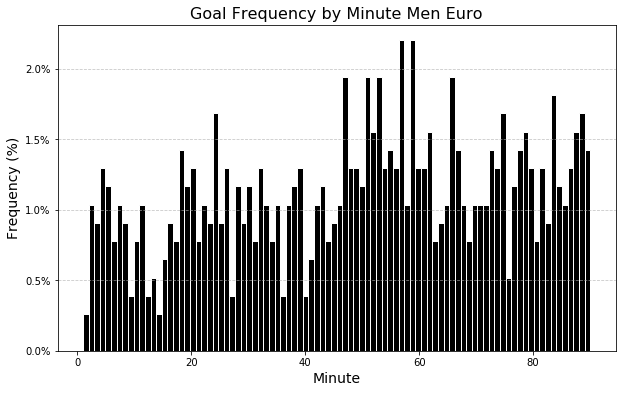

In [4]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(goals_eu['goal_minute'], bins=90, range=(1, 90), density=True, color='black', edgecolor='white')

# Set titles and labels
plt.title("Goal Frequency by Minute Men Euro", fontsize=16)
plt.xlabel("Minute", fontsize=14)
plt.ylabel("Frequency (%)", fontsize=14)

# Adjust the y-axis to show percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.1f}%'))

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [5]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\in\fifa.xlsx'

# Read the dataset with a different encoding
goals_wc = pd.read_excel(data_path)

# Assuming `df_goals_wc` is the dataset name after loading
goals_wc['goal_minute'] = goals_wc['minute_regulation'] + goals_wc['minute_stoppage']



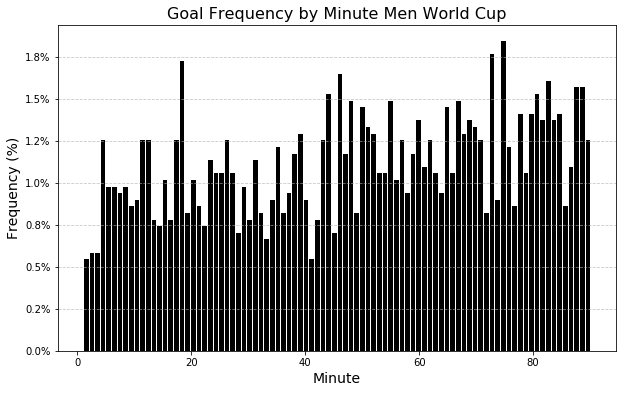

In [6]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(goals_wc['goal_minute'], bins=90, range=(1, 90), density=True, color='black', edgecolor='white')

# Set titles and labels
plt.title("Goal Frequency by Minute Men World Cup", fontsize=16)
plt.xlabel("Minute", fontsize=14)
plt.ylabel("Frequency (%)", fontsize=14)

# Adjust the y-axis to show percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.1f}%'))

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Summary Stats

## goals World Cup

In [7]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\out\wiki\men\fifa\wc\goals_wc_fifa.xlsx'

# Read the dataset with a different encoding
goals_wc_fifa = pd.read_excel(data_path)

In [8]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\out\wiki\men\uefa\wc\goals_wc_uefa.xlsx'

# Read the dataset with a different encoding
goals_wc_uefa = pd.read_excel(data_path)

In [9]:
# Define variables to include
selected_vars = [
    'goal_minute',
    'half_time',
    'qual_changed',
    'qual_count',
    'elo_home',
    'elo_away',
    'suspense'
]

In [10]:
# Drop NA values in each dataset based on selected variables
wc_clean = goals_wc_fifa[selected_vars].dropna()
eu_clean = goals_wc_uefa[selected_vars].dropna()

# Function to generate summary with count
def get_summary(df, prefix):
    stats = df.describe().loc[['count', 'mean', 'std', 'min', 'max']].T
    stats.columns = [f'{prefix}_Obs', f'{prefix}_Mean', f'{prefix}_St. Dev.', f'{prefix}_Min', f'{prefix}_Max']
    return stats

# Get summaries
wc_summary = get_summary(wc_clean, 'WC')
eu_summary = get_summary(eu_clean, 'EU')

# Combine them
combined_summary = pd.concat([wc_summary, eu_summary], axis=1)

combined_summary

,WC_Obs,WC_Mean,WC_St. Dev.,WC_Min,WC_Max,EU_Obs,EU_Mean,EU_St. Dev.,EU_Min,EU_Max
goal_minute,381.0,51.986877,26.892815,1.0,96.0,381.0,51.986877,26.892815,1.0,96.0
half_time,381.0,1.595801,0.491382,1.0,2.0,381.0,1.595801,0.491382,1.0,2.0
qual_changed,381.0,0.204724,0.404031,0.0,1.0,381.0,0.188976,0.392005,0.0,1.0
qual_count,381.0,0.748031,0.983831,0.0,4.0,381.0,0.737533,1.033330,0.0,5.0
elo_home,381.0,1797.086614,121.921244,1492.0,2090.0,381.0,1797.086614,121.921244,1492.0,2090.0
elo_away,381.0,1837.918635,141.451484,1460.0,2169.0,381.0,1837.918635,141.451484,1460.0,2169.0
suspense,381.0,0.398950,0.490326,0.0,1.0,381.0,0.354331,0.478939,0.0,1.0


## goals Euro

In [11]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\out\wiki\men\fifa\eu\goals_eu_fifa.xlsx'

# Read the dataset with a different encoding
goals_eu_fifa = pd.read_excel(data_path)

In [12]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\out\wiki\men\uefa\eu\goals_eu_uefa.xlsx'

# Read the dataset with a different encoding
goals_eu_uefa = pd.read_excel(data_path)

In [13]:
# Drop NA values in each dataset based on selected variables
wc_clean = goals_eu_fifa[selected_vars].dropna()
eu_clean = goals_eu_uefa[selected_vars].dropna()

# Function to generate summary with count
def get_summary(df, prefix):
    stats = df.describe().loc[['count', 'mean', 'std', 'min', 'max']].T
    stats.columns = [f'{prefix}_Obs', f'{prefix}_Mean', f'{prefix}_St. Dev.', f'{prefix}_Min', f'{prefix}_Max']
    return stats

# Get summaries
wc_summary = get_summary(wc_clean, 'WC')
eu_summary = get_summary(eu_clean, 'EU')

# Combine them
combined_summary = pd.concat([wc_summary, eu_summary], axis=1)

combined_summary

,WC_Obs,WC_Mean,WC_St. Dev.,WC_Min,WC_Max,EU_Obs,EU_Mean,EU_St. Dev.,EU_Min,EU_Max
goal_minute,226.0,52.411504,26.298182,2.0,100.0,226.0,52.411504,26.298182,2.0,100.0
half_time,226.0,1.606195,0.489677,1.0,2.0,226.0,1.606195,0.489677,1.0,2.0
qual_changed,226.0,0.305310,0.461561,0.0,1.0,226.0,0.283186,0.451546,0.0,1.0
qual_count,226.0,1.234513,1.433831,0.0,7.0,226.0,1.070796,1.266434,0.0,6.0
elo_home,226.0,1857.168142,110.835646,1600.0,2077.0,226.0,1857.168142,110.835646,1600.0,2077.0
elo_away,226.0,1895.623894,113.428137,1523.0,2127.0,226.0,1895.623894,113.428137,1523.0,2127.0
suspense,226.0,0.464602,0.499852,0.0,1.0,226.0,0.420354,0.494711,0.0,1.0


## mbm World Cup 

In [14]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\out\wiki\men\fifa\wc\mbm_wc_fifa.xlsx'

# Read the dataset with a different encoding
goals_wc_fifa = pd.read_excel(data_path)

In [15]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\out\wiki\men\uefa\wc\mbm_wc_uefa.xlsx'

# Read the dataset with a different encoding
goals_wc_uefa = pd.read_excel(data_path)

In [16]:
# Define variables to include
selected_vars = [
    'qual_changed',
    'qual_count',
    'elo_home',
    'elo_away',
    'suspense'
]

In [17]:
# Drop NA values in each dataset based on selected variables
wc_clean = goals_wc_fifa[selected_vars].dropna()
eu_clean = goals_wc_uefa[selected_vars].dropna()

# Function to generate summary with count
def get_summary(df, prefix):
    stats = df.describe().loc[['count', 'mean', 'std', 'min', 'max']].T
    stats.columns = [f'{prefix}_Obs', f'{prefix}_Mean', f'{prefix}_St. Dev.', f'{prefix}_Min', f'{prefix}_Max']
    return stats

# Get summaries
wc_summary = get_summary(wc_clean, 'WC')
eu_summary = get_summary(eu_clean, 'EU')

# Combine them
combined_summary = pd.concat([wc_summary, eu_summary], axis=1)

combined_summary

,WC_Obs,WC_Mean,WC_St. Dev.,WC_Min,WC_Max,EU_Obs,EU_Mean,EU_St. Dev.,EU_Min,EU_Max
qual_changed,5204.0,0.214835,0.410747,0.0,1.0,5204.0,0.200615,0.400499,0.0,1.0
qual_count,5204.0,0.665065,0.866575,0.0,4.0,5204.0,0.627402,0.895515,0.0,5.0
elo_home,5204.0,1789.282475,122.027953,1492.0,2090.0,5204.0,1789.282475,122.027953,1492.0,2090.0
elo_away,5204.0,1841.206188,142.297928,1460.0,2169.0,5204.0,1841.206188,142.297928,1460.0,2169.0
suspense,5204.0,0.409493,0.491787,0.0,1.0,5204.0,0.369908,0.482826,0.0,1.0


## mbm Euro

In [18]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\out\wiki\men\fifa\eu\mbm_eu_fifa.xlsx'

# Read the dataset with a different encoding
goals_eu_fifa = pd.read_excel(data_path)

In [19]:
 # Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\tiebreak_wc\data\out\wiki\men\uefa\eu\mbm_eu_uefa.xlsx'

# Read the dataset with a different encoding
goals_eu_uefa = pd.read_excel(data_path)

In [20]:
# Drop NA values in each dataset based on selected variables
wc_clean = goals_eu_fifa[selected_vars].dropna()
eu_clean = goals_eu_uefa[selected_vars].dropna()

# Function to generate summary with count
def get_summary(df, prefix):
    stats = df.describe().loc[['count', 'mean', 'std', 'min', 'max']].T
    stats.columns = [f'{prefix}_Obs', f'{prefix}_Mean', f'{prefix}_St. Dev.', f'{prefix}_Min', f'{prefix}_Max']
    return stats

# Get summaries
wc_summary = get_summary(wc_clean, 'WC')
eu_summary = get_summary(eu_clean, 'EU')

# Combine them
combined_summary = pd.concat([wc_summary, eu_summary], axis=1)

combined_summary

,WC_Obs,WC_Mean,WC_St. Dev.,WC_Min,WC_Max,EU_Obs,EU_Mean,EU_St. Dev.,EU_Min,EU_Max
qual_changed,2979.0,0.346425,0.475910,0.0,1.0,2979.0,0.325948,0.468807,0.0,1.0
qual_count,2979.0,1.064115,1.310795,0.0,7.0,2979.0,0.918093,1.179352,0.0,6.0
elo_home,2979.0,1848.555220,113.426206,1600.0,2077.0,2979.0,1848.555220,113.426206,1600.0,2077.0
elo_away,2979.0,1880.713327,121.423379,1523.0,2127.0,2979.0,1880.713327,121.423379,1523.0,2127.0
suspense,2979.0,0.505539,0.500053,0.0,1.0,2979.0,0.473985,0.499407,0.0,1.0
